In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

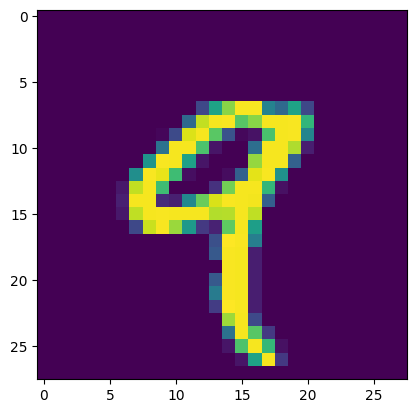

In [5]:
plt.imshow(x_train[4])

In [6]:
x_train = x_train/255
x_test = x_test/255

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2787 - accuracy: 0.9192 - val_loss: 0.1492 - val_accuracy: 0.9568
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1219 - accuracy: 0.9629 - val_loss: 0.1190 - val_accuracy: 0.9655
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0827 - accuracy: 0.9745 - val_loss: 0.1037 - val_accuracy: 0.9692
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0618 - accuracy: 0.9811 - val_loss: 0.0975 - val_accuracy: 0.9712
Epoch 5/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0981 - val_accuracy: 0.9719
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.0980 - val_accuracy: 0.9718
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0315 - accuracy: 0.9894 - val_loss: 0.0982 - val_accurac

In [17]:
y_prob = model.predict(x_test )

313/313 [==============================] - 2s 4ms/step


In [18]:
y_prob

array([[4.7506676e-14, 5.5305507e-18, 1.6533535e-11, ..., 9.9999994e-01,
        1.2828030e-20, 5.2080708e-11],
       [2.8926113e-24, 2.8644884e-10, 9.9999994e-01, ..., 2.7738503e-16,
        8.9227746e-21, 9.5729824e-31],
       [2.7154714e-16, 9.9999994e-01, 5.2077429e-11, ..., 1.9880050e-08,
        5.8938111e-11, 6.1488901e-17],
       ...,
       [2.8723923e-30, 2.0374573e-18, 6.2887296e-25, ..., 2.9736163e-15,
        1.8579784e-20, 1.7977228e-12],
       [5.9448031e-28, 4.7012936e-27, 3.8916411e-27, ..., 8.0440988e-21,
        1.2532863e-11, 3.8912512e-29],
       [9.3253720e-14, 3.0310537e-21, 9.6198892e-21, ..., 1.9601333e-21,
        2.3315082e-23, 3.3117109e-28]], dtype=float32)

In [19]:
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9729

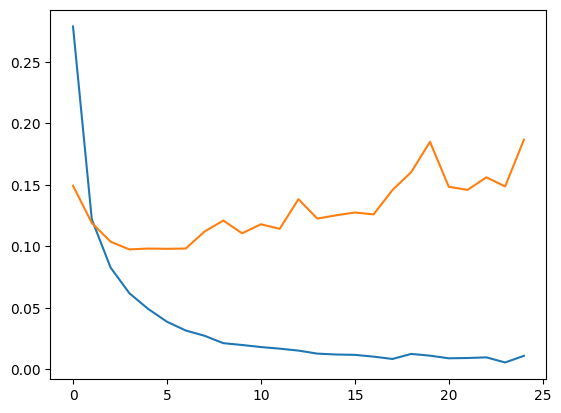

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

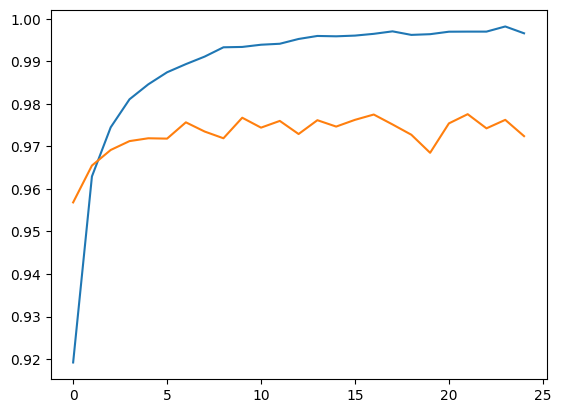

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

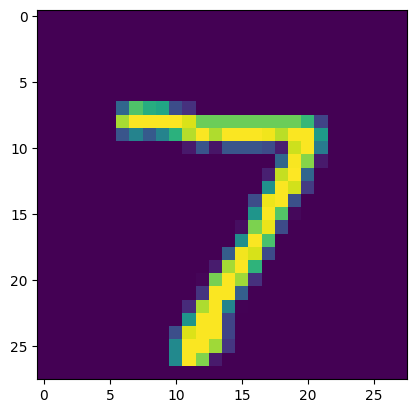

In [30]:
plt.imshow(x_test[0])

In [32]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 33ms/step


array([7])